In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import json
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [2]:
import hdbscan
import nltk
import numpy as np
import pandas as pd
import random
import re
import spacy
import textacy

from gmplot import gmplot
from mapsplotlib import mapsplot as mplt
from nltk.corpus import twitter_samples
from nltk.tag import pos_tag_sents
from pymprog import *
from sklearn.cluster import DBSCAN
from sklearn.neighbors import DistanceMetric

In [3]:
import pandas as pd

df = pd.read_csv("FIFA.csv")

In [4]:
df.columns

Index(['ID', 'lang', 'Date', 'Source', 'len', 'Orig_Tweet', 'Tweet', 'Likes',
       'RTs', 'Hashtags', 'UserMentionNames', 'UserMentionID', 'Name', 'Place',
       'Followers', 'Friends'],
      dtype='object')

## Remove tweets that are not in English

Text(0.5, 1.0, 'Tweets in FIFA World Cup 2018')

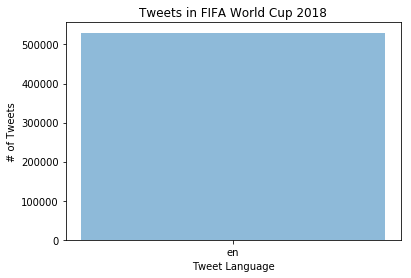

In [5]:
import matplotlib.pyplot as plt
# plots number of tweets in each language
counts = df['lang'].value_counts()
plt.bar(counts.index, counts, align='center', alpha=0.5)
plt.xlabel('Tweet Language')
plt.ylabel('# of Tweets')
plt.title('Tweets in FIFA World Cup 2018')

In [6]:
df["Time"] = np.array([datetime.split()[1] for datetime in df["Date"]])
df["Date"] = np.array([datetime.split()[0] for datetime in df["Date"]])

# Flagging all potential eventful tweets

In [7]:
# converting to a Datetime format by hour
df2 = df.copy()
df2['Datetime']= pd.to_datetime(df2['Date'].apply(str)+' '+df2['Time'].apply(lambda x: x.split(':')[0]) + df2['Time'].apply(lambda x: x.split(':')[1]))
df2['DateHour'] = pd.to_datetime(df2['Date'].apply(str)+' '+df2['Time'].apply(lambda x: x.split(':')[0])+':00')

tableFlag=[]


In [8]:
print(df2["Datetime"][100165])
print(df2["Time"][100165])

2018-07-03 22:14:00
22:14:32


In [9]:
data_sorted = df2.sort_values(by=['Date'],inplace=False)
data_sorted = data_sorted.reset_index(drop=True)

list_date = []
for temp in data_sorted["Date"]:
    list_date.append(temp)

list_date = list(dict.fromkeys(list_date))
list_date

['2018-06-29',
 '2018-06-30',
 '2018-07-01',
 '2018-07-02',
 '2018-07-03',
 '2018-07-04',
 '2018-07-10',
 '2018-07-11',
 '2018-07-15']

In [10]:
tableFlag =[]
i = 0
tableCurrent = []
dfchange = df2.loc[df2['Date']==list_date[3]]
ts = dfchange.set_index('DateHour')
vc = ts.groupby("Datetime").count()
col = ['ID']
vc2 = vc[col]
##calculating threshold to flag hours with more tweets
th = vc2['ID'].mean()+2*vc2['ID'].std()
#iterating through each row to find flags
i=0
for index, row in vc2.iterrows():
    if (row["ID"]>th):
        tableFlag.append([i,index])
        #tableCurrent.append([i,index])
        i+=1
        count+=1
tableFlag

[]

In [11]:
# tableFlag = []
# count = 0

# for temp_date in list_date:
#     i = 0
#     tableCurrent = []
#     dfchange = df2.loc[df2['Date']==temp_date]
#     ts = dfchange.set_index('DateHour')
#     vc = ts.groupby("Datetime").count()
#     col = ['ID']
#     vc2 = vc[col]
#     ##calculating threshold to flag hours with more tweets
#     th = vc2['ID'].mean()+2*vc2['ID'].std()
#     #iterating through each row to find flags
#     i=0
#     for index, row in vc2.iterrows():
#         if (row["ID"]>th):
#             #tableFlag.append([i,index])
#             tableCurrent.append([i,index])
#             i+=1
#             count+=1
#     tableFlag.append(tableCurrent)
# print("Count: ",count)
# tableFlag

In [12]:
# count = 0 
# tableFlag = []
# # graphing the threshold vs hourly tweet occurences
# for temp_date in list_date: 
#     tableCurrent = []
#     dfchange = df2.loc[df2['Date']==temp_date]
#     ts = dfchange.set_index('DateHour')
#     vc = ts.groupby('DateHour').count()
#     col = ['ID']
#     vc2 = vc[col]
#     vc3 = vc2.copy()
#     th = vc2['ID'].mean()+2*vc2['ID'].std()
#     for index, row in vc2.iterrows():
#         if (row["ID"]>th):
#             #tableFlag.append([count, index])
#             tableCurrent.append([count,index])
#             count+=1

#     vc4 = vc2.copy()
#     vc4.rename(columns={'ID':'Hourly'},inplace=True)
#     vc3['ID'] = th
#     vc3.rename(columns={'ID':'Threshold'},inplace=True)

#     ax = vc2.plot()
#     vc3.plot(ax = ax)
#     tableFlag.append(tableCurrent)

In [13]:
tableFlag = []
count = 0
for i in range(len(list_date)):
    dfchange = df2.loc[df2['Date']==list_date[i]]
    ts = dfchange.set_index('Date')
    vc = ts.groupby("Datetime").count()
    col = ['ID']
    vc2 = vc[col]
    ##calculating threshold to flag hours with more tweets
    th = vc2['ID'].mean()+2*vc2['ID'].std()
    #iterating through each row to find flags
    for index, row in vc2.iterrows():
        if (row["ID"]>th):
            tableFlag.append([i,index])
            count+=1
print("Count: ",count)
tableFlag

Count:  55


[[1, Timestamp('2018-06-30 16:17:00')],
 [1, Timestamp('2018-06-30 16:18:00')],
 [1, Timestamp('2018-06-30 16:19:00')],
 [1, Timestamp('2018-06-30 16:20:00')],
 [1, Timestamp('2018-06-30 16:21:00')],
 [1, Timestamp('2018-06-30 16:22:00')],
 [1, Timestamp('2018-06-30 16:23:00')],
 [1, Timestamp('2018-06-30 16:24:00')],
 [1, Timestamp('2018-06-30 16:25:00')],
 [1, Timestamp('2018-06-30 16:26:00')],
 [1, Timestamp('2018-06-30 16:27:00')],
 [1, Timestamp('2018-06-30 16:28:00')],
 [1, Timestamp('2018-06-30 16:29:00')],
 [1, Timestamp('2018-06-30 16:30:00')],
 [2, Timestamp('2018-07-01 20:45:00')],
 [2, Timestamp('2018-07-01 20:46:00')],
 [2, Timestamp('2018-07-01 20:47:00')],
 [2, Timestamp('2018-07-01 20:48:00')],
 [2, Timestamp('2018-07-01 20:49:00')],
 [2, Timestamp('2018-07-01 20:50:00')],
 [2, Timestamp('2018-07-01 20:51:00')],
 [2, Timestamp('2018-07-01 20:52:00')],
 [2, Timestamp('2018-07-01 20:53:00')],
 [2, Timestamp('2018-07-01 20:54:00')],
 [2, Timestamp('2018-07-01 20:55:00')],


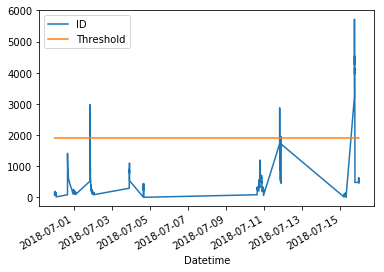

In [14]:
# graphing the threshold vs hourly tweet occurences
dfchange = df2.loc[df2['Date'] != -1]
ts = dfchange.set_index('Datetime')
vc = ts.groupby('Datetime').count()
col = ['ID']
vc2 = vc[col]
vc3 = vc2.copy()
th = vc2['ID'].mean()+2*vc2['ID'].std()
for index, row in vc2.iterrows():
    if (row["ID"]>th):
        tableFlag.append([i, index])
        count+=1

vc4 = vc2.copy()
vc4.rename(columns={'ID':'Hourly'},inplace=True)
vc3['ID'] = th
vc3.rename(columns={'ID':'Threshold'},inplace=True)

ax = vc2.plot()
vc3.plot(ax = ax)

In [15]:
tableFlag

[[1, Timestamp('2018-06-30 16:17:00')],
 [1, Timestamp('2018-06-30 16:18:00')],
 [1, Timestamp('2018-06-30 16:19:00')],
 [1, Timestamp('2018-06-30 16:20:00')],
 [1, Timestamp('2018-06-30 16:21:00')],
 [1, Timestamp('2018-06-30 16:22:00')],
 [1, Timestamp('2018-06-30 16:23:00')],
 [1, Timestamp('2018-06-30 16:24:00')],
 [1, Timestamp('2018-06-30 16:25:00')],
 [1, Timestamp('2018-06-30 16:26:00')],
 [1, Timestamp('2018-06-30 16:27:00')],
 [1, Timestamp('2018-06-30 16:28:00')],
 [1, Timestamp('2018-06-30 16:29:00')],
 [1, Timestamp('2018-06-30 16:30:00')],
 [2, Timestamp('2018-07-01 20:45:00')],
 [2, Timestamp('2018-07-01 20:46:00')],
 [2, Timestamp('2018-07-01 20:47:00')],
 [2, Timestamp('2018-07-01 20:48:00')],
 [2, Timestamp('2018-07-01 20:49:00')],
 [2, Timestamp('2018-07-01 20:50:00')],
 [2, Timestamp('2018-07-01 20:51:00')],
 [2, Timestamp('2018-07-01 20:52:00')],
 [2, Timestamp('2018-07-01 20:53:00')],
 [2, Timestamp('2018-07-01 20:54:00')],
 [2, Timestamp('2018-07-01 20:55:00')],


In [16]:
while [] in tableFlag:
    tableFlag.remove([])

In [17]:
tableFlag

[[1, Timestamp('2018-06-30 16:17:00')],
 [1, Timestamp('2018-06-30 16:18:00')],
 [1, Timestamp('2018-06-30 16:19:00')],
 [1, Timestamp('2018-06-30 16:20:00')],
 [1, Timestamp('2018-06-30 16:21:00')],
 [1, Timestamp('2018-06-30 16:22:00')],
 [1, Timestamp('2018-06-30 16:23:00')],
 [1, Timestamp('2018-06-30 16:24:00')],
 [1, Timestamp('2018-06-30 16:25:00')],
 [1, Timestamp('2018-06-30 16:26:00')],
 [1, Timestamp('2018-06-30 16:27:00')],
 [1, Timestamp('2018-06-30 16:28:00')],
 [1, Timestamp('2018-06-30 16:29:00')],
 [1, Timestamp('2018-06-30 16:30:00')],
 [2, Timestamp('2018-07-01 20:45:00')],
 [2, Timestamp('2018-07-01 20:46:00')],
 [2, Timestamp('2018-07-01 20:47:00')],
 [2, Timestamp('2018-07-01 20:48:00')],
 [2, Timestamp('2018-07-01 20:49:00')],
 [2, Timestamp('2018-07-01 20:50:00')],
 [2, Timestamp('2018-07-01 20:51:00')],
 [2, Timestamp('2018-07-01 20:52:00')],
 [2, Timestamp('2018-07-01 20:53:00')],
 [2, Timestamp('2018-07-01 20:54:00')],
 [2, Timestamp('2018-07-01 20:55:00')],


In [18]:
# retrieve tweets associated with flagged timestamp
df2['event_id'] = -1
count=0
for currentTemp in tableFlag:
    for index, array in enumerate(currentTemp):
        print(count)
        cluster = array[0]
        timestamp = array[1]
        df2['event_id'] = (np.where((df2['Datetime'] == timestamp), count, df2["event_id"]))
        count+=1

0


TypeError: 'int' object is not subscriptable

In [19]:
df2.to_pickle('events.pkl')

In [20]:
events = pd.read_pickle('events.pkl')

In [21]:
df2.columns

Index(['ID', 'lang', 'Date', 'Source', 'len', 'Orig_Tweet', 'Tweet', 'Likes',
       'RTs', 'Hashtags', 'UserMentionNames', 'UserMentionID', 'Name', 'Place',
       'Followers', 'Friends', 'Time', 'Datetime', 'DateHour', 'event_id'],
      dtype='object')

## Find Similar Tweets

In [22]:
from sklearn.cluster import DBSCAN
import pandas as pd
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

num_clusters = 10
stemmer = SnowballStemmer("english")

<h3> Remove hashtags,mentions,retweets from the tweet and import them to a new column </h3>

In [23]:
def remove_patterns(input_txt,mentions,hashtags,RT):
    m = re.findall(mentions, input_txt)
    h = re.findall(hashtags,input_txt)
    r = re.findall(RT,input_txt)
    u = re.findall(r"http\S+",input_txt)
    mention_list = []
    hashtag_list = []
    url_list = []
    rt1 = 0
    
    
    for i in u:
        url_list.append(i)
        #input_txt = re.sub(i,'',input_txt)
    input_txt = re.sub(r"http\S+",'',input_txt)
    for i in m:
        mention_list.append(i)
        input_txt = re.sub(i, '', input_txt)
    for i in h:
        hashtag_list.append(i)
        input_txt = re.sub(i,'',input_txt)
    if r!=0 :
        rt1 = 1
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    #Some json
    x = {"input_text" : input_txt,"user_mentions":mention_list,"hashtags":hashtag_list,"is_RT":rt1,"is_URL":url_list}
    #y = json.dumps(x)
    return x

temp = np.vectorize(remove_patterns)(df2['Orig_Tweet'],"@[\w]*","#[\w]*","RT")

In [24]:
#print(df["Orig_Tweet"][12])
df2["text"] = np.array([text["input_text"] for text in temp])
df2["hashtag"] = np.array([text["hashtags"] for text in temp])
df2["new_mentions"] = np.array([text["user_mentions"] for text in temp]) 
df2["RT"] = np.array([text["is_RT"] for text in temp])
df2["URL"] = np.array([text["is_URL"] for text in temp])
df2.head()

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,...,Friends,Time,Datetime,DateHour,event_id,text,hashtag,new_mentions,RT,URL
0,1013597060640145408,en,2018-07-02,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \...,Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs,0,477,"WorldCup,POR,ENG",...,828,01:35:45,2018-07-02 01:35:00,2018-07-02 01:00:00,-1,: Only two goalkeepers have saved three penalties in a penalty shoot-out: \r\n\r\n1/7/2006: 's...,"[#WorldCup, #POR, #ENG]",[@Squawka],1,[]
1,1013597056219295744,en,2018-07-02,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the winning penalty to send @HNS_CFF into the #WorldCup ...,scores the winning penalty to send into the quarter finals where they will face Russia,0,1031,WorldCup,...,686,01:35:44,2018-07-02 01:35:00,2018-07-02 01:00:00,-1,": ?? scores the winning penalty to send into the quarter-finals, where they'll face Russia!…",[#WorldCup],"[@FCBarcelona, @ivanrakitic, @HNS_CFF]",1,[]
2,1013597047482544130,en,2018-07-02,Twitter for Android,107,RT @javierfernandez: Tonight we have big game.... @EvgeniPlushenko ?????? #worldcup https://t.co...,Tonight we have big game,0,488,worldcup,...,67,01:35:42,2018-07-02 01:35:00,2018-07-02 01:00:00,-1,: Tonight we have big game.... ??????,[#worldcup],"[@javierfernandez, @EvgeniPlushenko]",1,[https://t.co/LKifuNlubC]
3,1013597044198391808,en,2018-07-02,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe got that power power~\r\n\r\n#PowerByEXO #WorldCu...,We get stronger Turn the music up now We got that power power,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague",...,89,01:35:41,2018-07-02 01:35:00,2018-07-02 01:00:00,-1,We get stronger\r\nTurn the music up now\r\nWe got that power power~\r\n\r\n \r\n,"[#PowerByEXO, #WorldCup, #FIFAStadiumDJ, #XiuminLeague]","[@weareoneEXO, @FIFAWorldCup]",1,[]
4,1013597039999926272,en,2018-07-02,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \...,Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs,0,477,"WorldCup,POR,ENG",...,216,01:35:40,2018-07-02 01:35:00,2018-07-02 01:00:00,-1,: Only two goalkeepers have saved three penalties in a penalty shoot-out: \r\n\r\n1/7/2006: 's...,"[#WorldCup, #POR, #ENG]",[@Squawka],1,[]


<h3> Remove punctuation </h3>

In [ ]:
string.punctuation

In [ ]:
def remove_punct(text):
    temp = string.punctuation+"…"
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df2['Tweet_punct'] = df2['text'].apply(lambda x: remove_punct(x))

<h3>Tokenization</h3>

In [ ]:
#data["Tweet_tokenized"] = data["Tweet_punct"].apply(lambda x: x.lower().split())

In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    #text = nltk.word_tokenize(text)
    temp=[]
    for i in text:
        if i!='':
            temp.append(i)
    return temp

df2['Tweet_tokenized'] = df2['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df2.head()

<h3>Remove stopwords</h3>

In [ ]:
stopword = nltk.corpus.stopwords.words('english')

In [ ]:
def remove_stopwords(text):
     text = [word for word in text if word not in stopword]
     return text
    
df2['Tweet_nonstop'] = df2['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
print(df2["Orig_Tweet"][2])
print(df2['Tweet_nonstop'][2])

<h3>Stemming and Lammitization </h3>

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re

In [ ]:
df2.columns

In [ ]:
# Stemming is the process of breaking a word down into its root.
stemmer = SnowballStemmer('english')
stops = set(stopwords.words("english"))

In [ ]:
def stemming_to_sent(words):
    stemmed_words = [stemmer.stem(w) for w in words]
    return(" ".join(stemmed_words))
def stemming_to_words(words):
    stemmed_words = [stemmer.stem(w) for w in words]
    return stemmed_words

In [ ]:
df2["Stem_sent"] = np.array([stemming_to_sent(temp) for temp in df2["Tweet_nonstop"]])

In [ ]:
df2["Stem_words"] = np.array([stemming_to_words(temp) for temp in df2["Tweet_nonstop"]])

<h3>Creating Features from a Bag of Words (Using scikit-learn)</h3>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def getBagofWords(clean_train,i):
    # Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
    vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,stop_words = None,max_features = 5000)
    # fit_transform() does two functions: First, it fits the model 
    # and learns the vocabulary; second, it transforms our training 
    # data into feature vectors. 
    # Input to fit_transform(): a list of strings 
    # Output: a document-term sparse matrix [n_samples, n_features]
    train_data_features = vectorizer.fit_transform(clean_train)

    # Numpy arrays are easy to work with, so convert the result to an array
    train_data_features = train_data_features.toarray()
    return {"train_data_features":train_data_features,"vectorizer":vectorizer,"event_id":i,"clean_train":clean_train}

In [ ]:
maxn = df2["event_id"].max()+1
x_object = []
for i in range(maxn):
    strd=[]
    dfchange = df2.loc[df2["event_id"]==i]
    for temp in dfchange["Stem_sent"]:
        strd.append(temp)
    #print(strd)
    if strd:
        x_object.append(getBagofWords(strd,i))
    #getBagofWords(strd)

In [ ]:
train_data_features = x_object[0]["train_data_features"]
train_data_features.shape

In [ ]:
vectorizer = x_object[0]["vectorizer"]
vocab = vectorizer.get_feature_names()
print(vocab)

In [ ]:
def getTFIDFAndSim(tweets):
    vect = TfidfVectorizer(max_df=0.8, max_features=200000,stop_words='english', use_idf=True, ngram_range=(1,3))
    tfidf = vect.fit_transform(tweets)
    sim = (tfidf * tfidf.T).A
    return tfidf, sim

In [ ]:
def stemAndTokenize(tweets):   
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    for i in tweets:
        allwords_stemmed = tokenize_and_stem(i) # for each item in 'synopses', tokenize/stem
        totalvocab_stemmed.extend(allwords_stemmed) # extend the 'totalvocab_stemmed' list

        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)
    
    return totalvocab_stemmed, totalvocab_tokenized

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [ ]:
def new_clean_data(i,df2):
    sent = ""
    for temp in df2["Stem_words"].get(i):
        sent+= temp + " "
    for temp in df2["hashtag"].get(i):
        sent+= temp + " "
    for temp in df2["new_mentions"].get(i):
        sent+= temp+ " "
    for temp in df2["URL"].get(i):
        sent+= temp + " "
    return sent

df2["clean_data"] = np.array([new_clean_data(i,df2) for i in range(df2.shape[0])])

In [ ]:
def findSimilarTweets(tweets, tfidf,e):
    clustering = DBSCAN(eps=e, min_samples=3).fit(tfidf)
    #clustering = hdbscan.HDBSCAN(min_cluster_size=2).fit(tfidf)

    clusters = clustering.labels_.tolist()
    temp = clusters.copy()
    temp.remove

    addedCluster = tweets.copy()
    addedCluster['Cluster'] = clusters

    pd.options.display.max_colwidth = 100

    cls = []
    max_num_cluster = 0
    for i in range(0, num_clusters):
        tweetsInCluster = addedCluster[addedCluster['Cluster'] == i]
        if(tweetsInCluster.shape[0] > 0):
            cls.append(tweetsInCluster)
            #print("cluster: ",i)
            #print("Cluster", i, ":", tweetsInCluster.shape[0])
            #print(tweetsInCluster.shape[0])
            if (tweetsInCluster.shape[0]>max_num_cluster):
                    max_num_cluster=tweetsInCluster.shape[0]
                    max_i = i
                    max_cluster = tweetsInCluster
            #print(tweetsInCluster['Orig_Tweet'])
            #    return True
    print("Cluster", max_i, ":", max_cluster.shape[0])
    print(max_cluster['Orig_Tweet'])    
    return max_cluster

In [ ]:
maxn = df2["event_id"].max()
tweetsPerEvent = []
for i in range(0, maxn+1):
    tweetsPerEvent.append(df2[df2['event_id'] == i])
    #tweetsPerEvent[i]["Clean_data"] = np.array([temp for temp in df2[df2['event_id'] == i]["Orig_Tweet"]])

In [ ]:
count = 0
df = pd.DataFrame();
    
# For each spike, clean the tweets, stem and tokenize the tweets, and find the TF-IDF vectors for the tweets. Then cluster
# on the vectors to find similar tweets. If clusters are found, then take the largest cluster to find the tweets that define
# the event.
list_events = []
for i in range(0, len(tweetsPerEvent)):
#     if(tweetsPerEvent[i].shape[0] < 10):
#         continue
    
    
    
    
    count += 1
    #tweets = cleanData(tweetsPerEvent[i])
    #tweetsContent = tweets.copy()['clean_data']
    tweets = tweetsPerEvent[i]
    tweetsContent = tweets.copy()['clean_data']
    tfidf, sim = getTFIDFAndSim(tweetsContent)
    #totalvocab_stemmed, totalvocab_tokenized = stemAndTokenize(tweetsContent)
    print("Event", i, ":")
    print("Tweets: ",tweetsPerEvent[i].shape[0])
    #print(tweetsPerEvent[i]['Orig_Tweet'])
    #if(findSimilarTweets(tweets, tfidf,1.2)):
    #    df = pd.concat([df, tweetsPerEvent[i]])

    list_events.append(findSimilarTweets(tweets,tfidf,1.2))
    print("\n")
    
print(count)

In [ ]:
list_events[1]